---
---

<h1><center><ins>Exercise Sheet 7</ins></center></h1>
<h2><center>Numerical Methods <br><br>

---
---

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 - Backward Euler:

Consider the following first-order ODE:

$$ \frac{d y}{dt} = - 3 y \ , $$

**(A)** Solve this ODE with **your own forward Euler** implementation for $0\leq t\leq20$. Use the following step sizes: $\Delta t = 0.1, 0.25, 0.5, 0.75$, and plot the numerical solution for all four step sizes in four different figures. Also compare it with the exact analytical solution in the corresponding plot. Discuss your findings.

**(B)** Now implement **your own backward Euler** implementation and repeat all the steps from **(A)**. What do you notice?

**(C)** What complication arises in the implementation of the backward Euler, if we replace the right hand side of the ODE with $ (1-\frac{y}{3})y $? What kind of numerical methods already known from the lecture can you use to solve the arising equation? Please implement them to solve this ODE with the backward Euler and compare your solution with analytic one by plotting them in a figure.

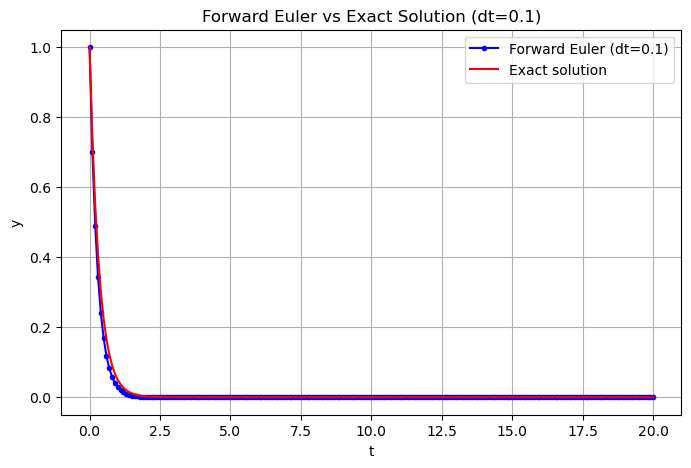

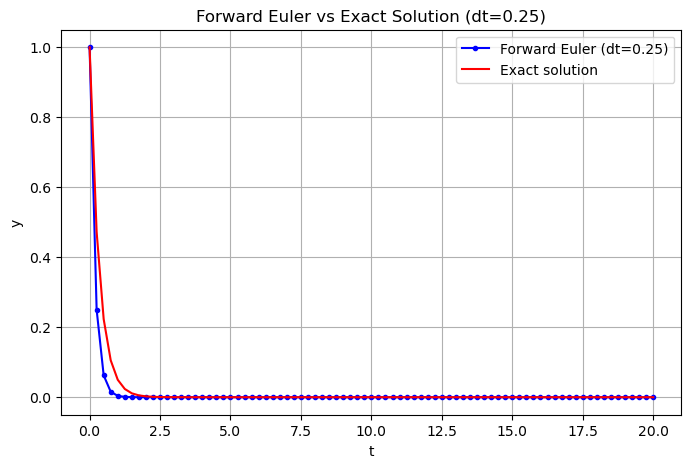

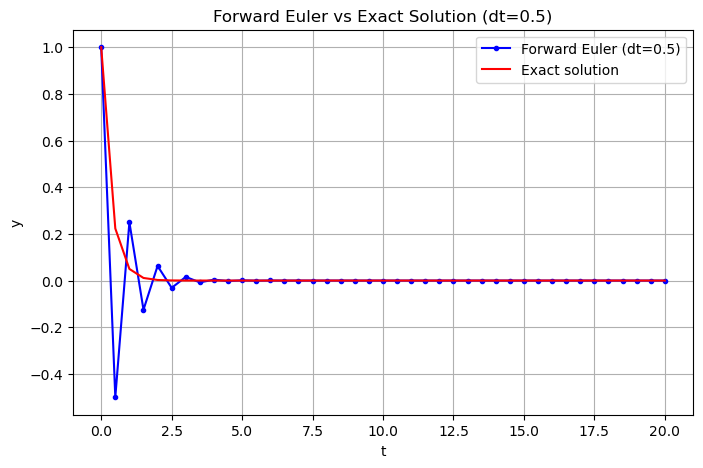

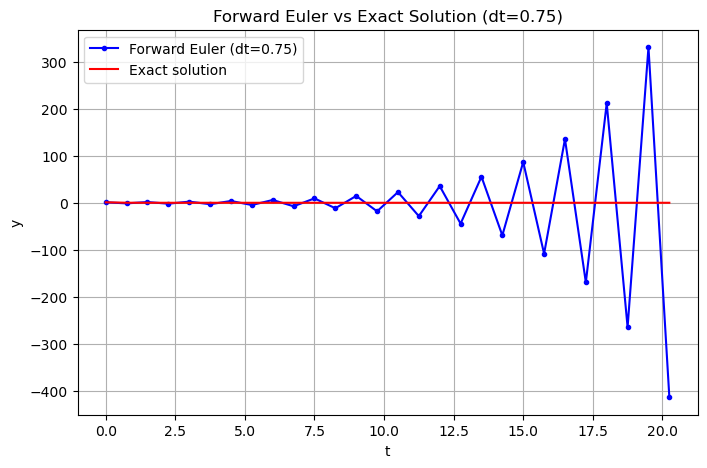

In [5]:
def forward_euler(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * f(t[i-1], y[i-1])
    
    return y

# ODE function
def f(t, y):
    return -3*y

# Initial condition
y0 = 1

# Exact solution analytic 
def exact_solution(t):
    return y0 * np.exp(-3 * t)

# Step sizes to test
dts = [0.1, 0.25, 0.5, 0.75]

for dt in dts:
    t = np.arange(0, 20 + dt, dt)
    y_num = forward_euler(f, y0, t)
    y_exact = exact_solution(t)
    
    plt.figure(figsize=(8,5))
    plt.plot(t, y_num, 'b.-', label='Forward Euler (dt={})'.format(dt))
    plt.plot(t, y_exact, 'r-', label='Exact solution')
    plt.title('Forward Euler vs Exact Solution (dt={})'.format(dt))
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


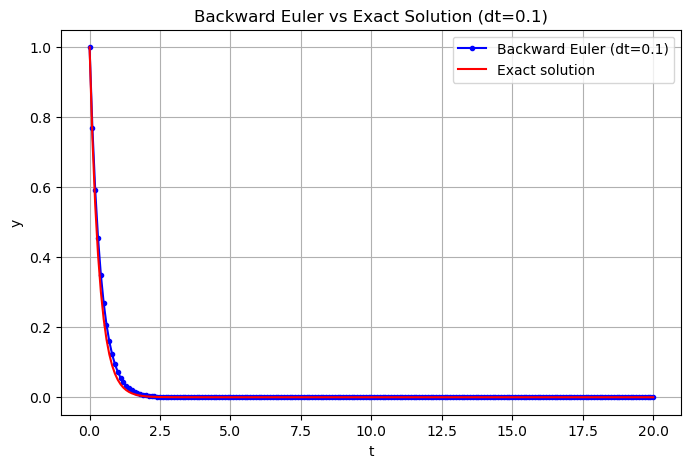

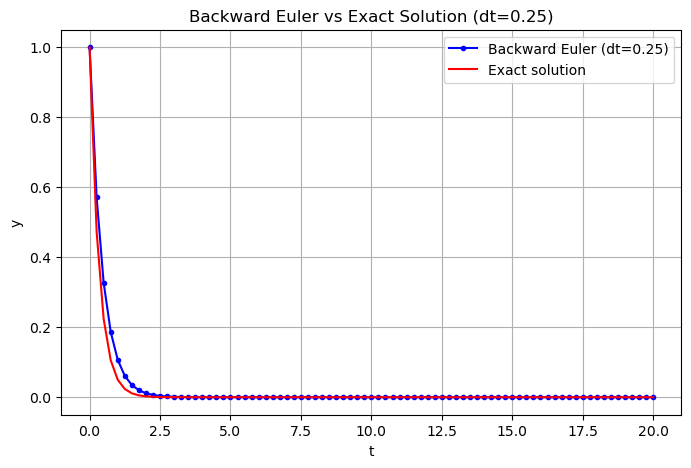

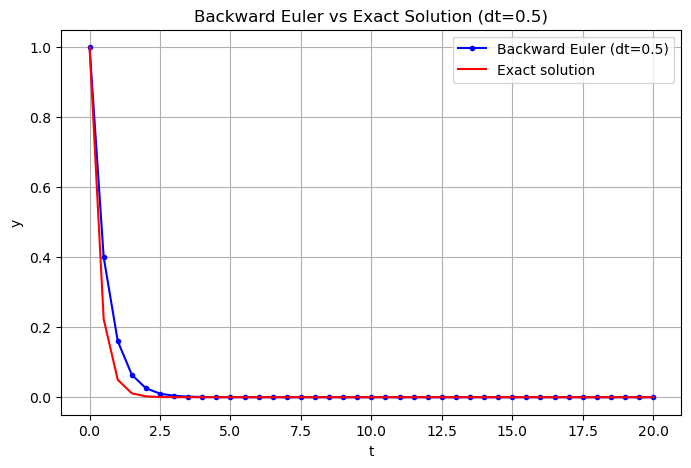

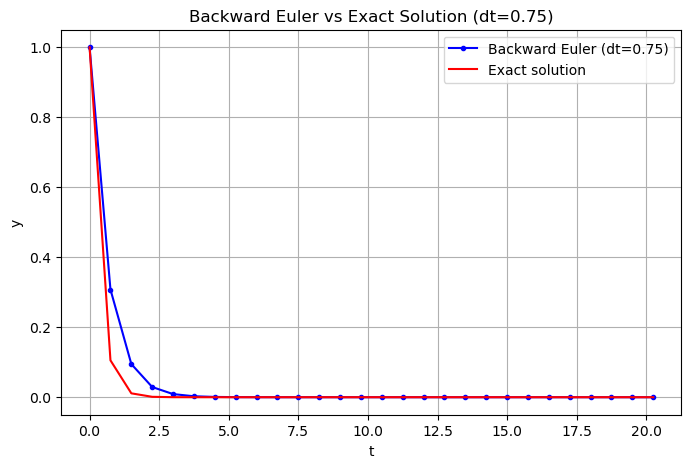

In [8]:
def backward_euler(f, y0, t): 
    y = np.zeros(len(t))
    y[0] = y0
    
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] / (1 + 3*dt)
    
    return y

# Exact analytic solution
def exact_solution(t):
    return np.exp(-3*t)

# Step sizes
dts = [0.1, 0.25, 0.5, 0.75]

for dt in dts:
    t = np.arange(0, 20+dt, dt)
    y_num = backward_euler(lambda t, y: -3*y, 1, t)
    y_exact = exact_solution(t)

    plt.figure(figsize=(8,5))
    plt.plot(t, y_num, 'b.-', label=f'Backward Euler (dt={dt})')
    plt.plot(t, y_exact, 'r', label='Exact solution')
    plt.title(f'Backward Euler vs Exact Solution (dt={dt})')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show() 
    


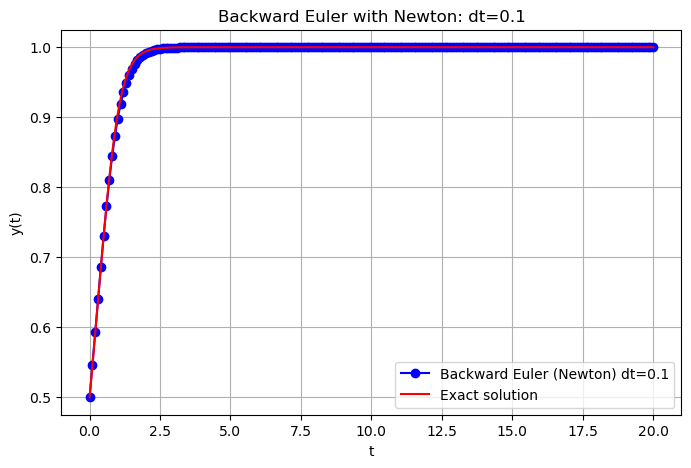

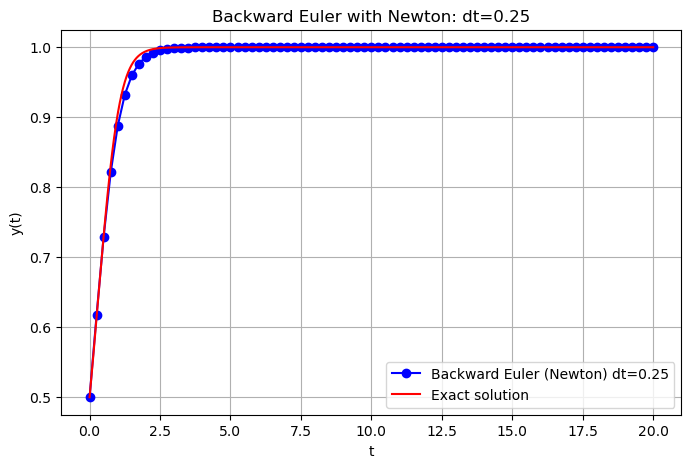

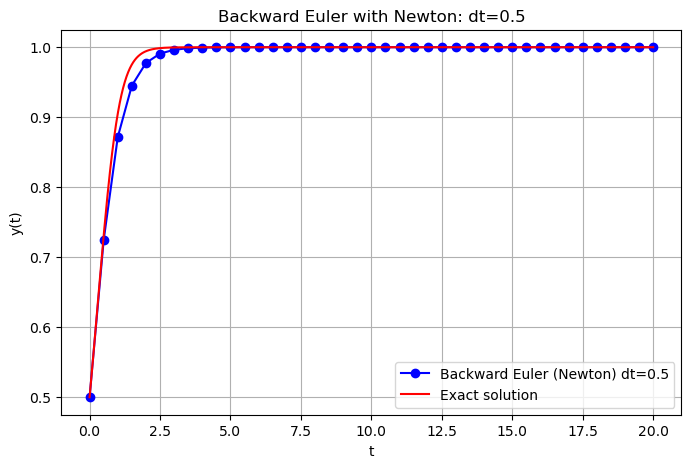

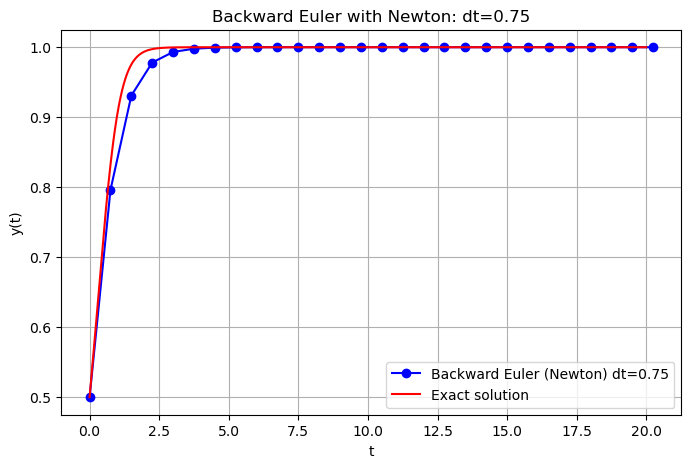

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ODE
def f(y):
    return (1 - y**3) * y

# G und G' für Newton 
def G(y_next, y_n, dt):
    return y_next - y_n - dt * f(y_next)

def dG(y_next, dt):
    return 1 - dt * (1 - 4*y_next**3)

# Backward Euler Schritt (Newton iteration) 
def backward_euler_step(y_n, dt, max_iter=20, tol=1e-12):
    # Startwert: Forward Euler (guter initial guess)
    y = y_n + dt * f(y_n)
    
    for k in range(max_iter):
        g = G(y, y_n, dt)
        dg = dG(y, dt)
        y_new = y - g/dg
        if abs(y_new - y) < tol:
            return y_new
        y = y_new
    
    return y   # falls nicht konvergiert

# Gesamtlösung 
def solve_backward_euler(y0, dt, t_end):
    t = np.arange(0, t_end+dt, dt)
    y = np.zeros_like(t)
    y[0] = y0
    for n in range(len(t)-1):
        y[n+1] = backward_euler_step(y[n], dt)
    return t, y

# exact solution 
def y_exact(t, y0=1.0):
    num = y0**3 * np.exp(3*t)
    den = 1 + y0**3 * (np.exp(3*t)-1)
    return (num/den)**(1/3)

# Plot für verschiedene Δt 
dts = [0.1, 0.25, 0.5, 0.75]
y0 = 0.5

for dt in dts:
    t, y_num = solve_backward_euler(y0, dt, 20)
    t_ex = np.linspace(0, 20, 2000)
    y_ex = y_exact(t_ex, y0)
    
    plt.figure(figsize=(8,5))
    plt.plot(t, y_num, 'bo-', label=f'Backward Euler (Newton) dt={dt}')
    plt.plot(t_ex, y_ex, 'r-', label='Exact solution')
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title(f'Backward Euler with Newton: dt={dt}')
    plt.grid(True)
    plt.legend()
    plt.show()


## Exercise 2 - Backward Euler Part 2:

Consider now the following second-order ODE:

$$ y^{\prime\prime} + 6 y^{\prime} + 5y = 10, $$

with initial conditions of $y(0) = 0$ and $y^{\prime}(0) = 5.$

**(A)** Solve this ODE with **your own backward Euler** implementation for $0\leq t\leq5$. What is the linear system of equation that you have to solve? (write it down in matrix notation). Within **your own backward Euler** implementation you are free to solve this system of equation using either numerical methods (e.g. np.linalg.solve) or invert the matrix by hand. Use a step size of 0.1 and 0.5. Plot the absolute error of the numerical solutions for both steps sizes compared to the exact solution. The exact solution is 

$$ y(t) = -\frac{3}{4}e^{-5t} -\frac{5}{4}e^{-t} + 2. $$


**(B)** Repeat **(A)** using **forward Euler**. What do you notice?

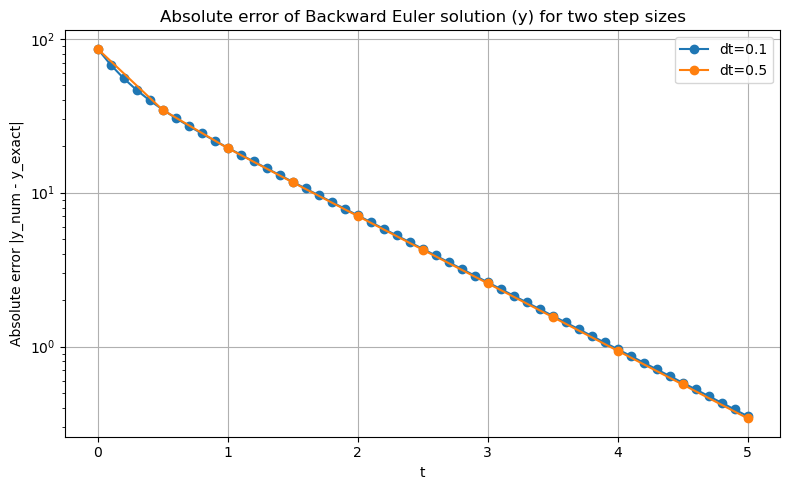

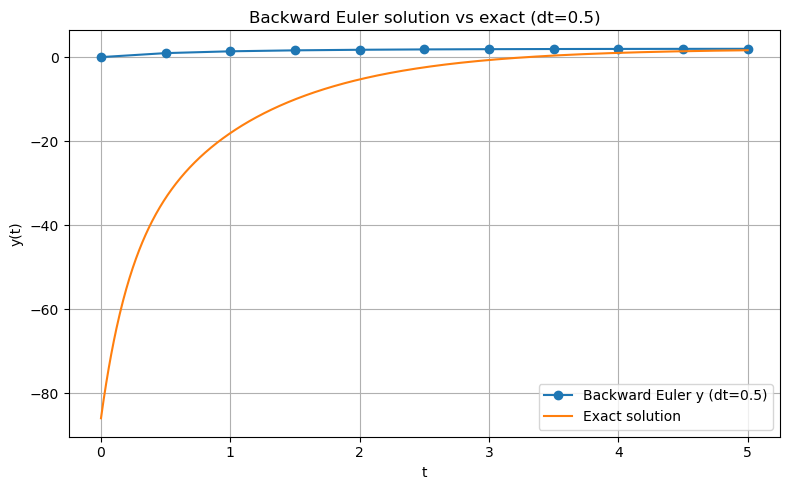

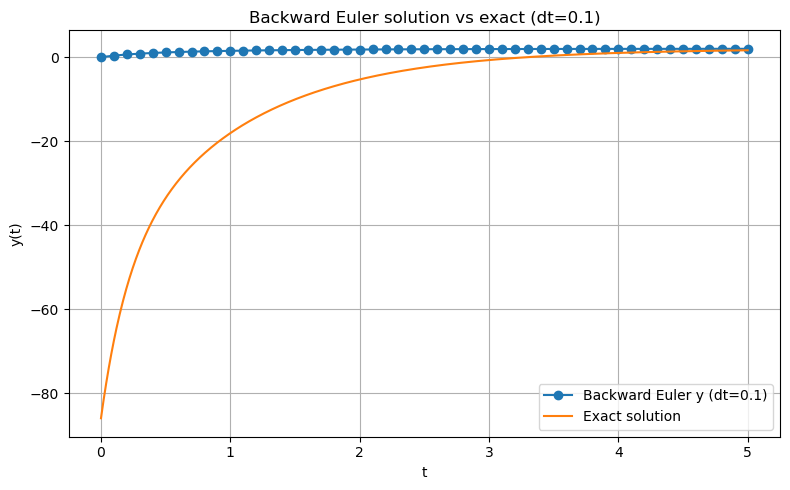

dt = 0.10: max abs error = 8.600e+01, final abs error = 3.532e-01
dt = 0.50: max abs error = 8.600e+01, final abs error = 3.422e-01


In [15]:
def backward_euler_second_order(dt, T=5.0, y0=0.0, v0=5.0):
    # Zeitgitter: check 0 is includes and T is last point 
    N = int(np.floor(T / dt))
    t = np.linspace(0.0, N*dt, N+1)
    if abs(t[-1] - T) > 1e-12:
        # include T as last point (last step can be smaller than t) 
        t = np.concatenate([t, np.array([T])])
    M = len(t)
    y = np.zeros(M)
    v = np.zeros(M)
    y[0] = y0
    v[0] = v0
    for n in range(M-1):
        dt_local = t[n+1] - t[n]
        A = np.array([[1.0, -dt_local],
                      [5.0*dt_local, 1.0 + 6.0*dt_local]])
        b = np.array([y[n], v[n] + 10.0*dt_local])
        sol = np.linalg.solve(A, b)
        y[n+1], v[n+1] = sol[0], sol[1]
    return t, y, v

def y_exact(t):
    return -34.0 * np.exp(-5.0 * t) - 54.0 * np.exp(-1.0 * t) + 2.0

# Parameter
y0 = 0.0
v0 = 5.0
T = 5.0
dts = [0.1, 0.5]
results = {}

for dt in dts:
    t, y_num, v_num = backward_euler_second_order(dt, T=T, y0=y0, v0=v0)
    y_ex = y_exact(t)
    err = np.abs(y_num - y_ex)
    results[dt] = (t, y_num, y_ex, err)

# absolute error for both dt log scale 
plt.figure(figsize=(8,5))
for dt in dts:
    t, y_num, y_ex, err = results[dt]
    plt.plot(t, err, marker='o', linestyle='-', label=f'dt={dt}')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('Absolute error |y_num - y_exact|')
plt.title('Absolute error of Backward Euler solution (y) for two step sizes')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Comparison numerical and exact solution for dt=0.5 
dt = 0.5
t, y_num, y_ex, err = results[dt]
plt.figure(figsize=(8,5))
plt.plot(t, y_num, marker='o', linestyle='-', label=f'Backward Euler y (dt={dt})')
t_fine = np.linspace(0, T, 1000)
plt.plot(t_fine, y_exact(t_fine), linestyle='-', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title(f'Backward Euler solution vs exact (dt={dt})')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Comparison numerical and exact solution for dt=0.1  
dt = 0.1
t, y_num, y_ex, err = results[dt]
plt.figure(figsize=(8,5))
plt.plot(t, y_num, marker='o', linestyle='-', label=f'Backward Euler y (dt={dt})')
t_fine = np.linspace(0, T, 1000)
plt.plot(t_fine, y_exact(t_fine), linestyle='-', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title(f'Backward Euler solution vs exact (dt={dt})')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# errors 
for dt in dts:
    t, y_num, y_ex, err = results[dt]
    print(f"dt = {dt:4.2f}: max abs error = {np.max(err):.3e}, final abs error = {err[-1]:.3e}")


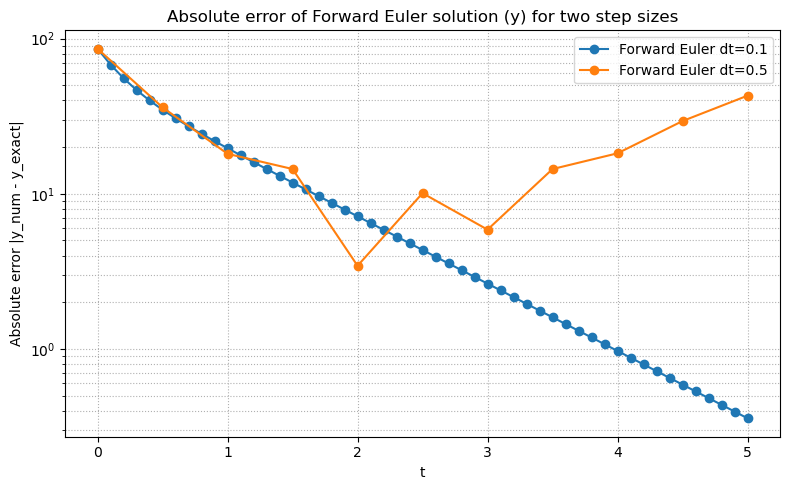

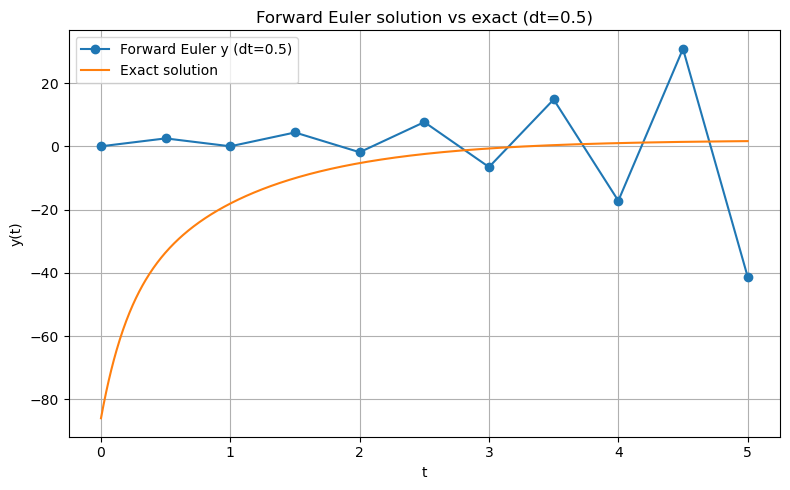

dt = 0.10: max abs error = 8.600e+01, final abs error = 3.574e-01
dt = 0.50: max abs error = 8.600e+01, final abs error = 4.289e+01


In [17]:
def forward_euler_second_order_from_t(y0, v0, t):
    M = len(t)
    y = np.zeros(M)
    v = np.zeros(M)
    y[0] = y0
    v[0] = v0
    for n in range(M-1):
        dt_local = t[n+1] - t[n]
        # explicit updates
        y[n+1] = y[n] + dt_local * v[n]
        v[n+1] = v[n] + dt_local * (10.0 - 6.0 * v[n] - 5.0 * y[n])
    return t, y, v

# exact solution 
def y_exact(t):
    return -34.0 * np.exp(-5.0 * t) - 54.0 * np.exp(-1.0 * t) + 2.0

# Parameters
y0 = 0.0
v0 = 5.0
T = 5.0
dts = [0.1, 0.5]

results = {}
for dt in dts:
    # Zeitgitter 
    t = np.arange(0.0, T + dt, dt)
    t, y_num, v_num = forward_euler_second_order_from_t(y0, v0, t)
    y_ex = y_exact(t)
    err = np.abs(y_num - y_ex)
    results[dt] = (t, y_num, y_ex, err)

# Plot absolute error 
plt.figure(figsize=(8,5))
for dt in dts:
    t, y_num, y_ex, err = results[dt]
    plt.plot(t, err, marker='o', linestyle='-', label=f'Forward Euler dt={dt}')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('Absolute error |y_num - y_exact|')
plt.title('Absolute error of Forward Euler solution (y) for two step sizes')
plt.grid(True, which='both', ls=':')
plt.legend()
plt.tight_layout()
plt.show()

# numerical solution vs exact fpr dt = 0.5 
dt = 0.5
t, y_num, y_ex, err = results[dt]
plt.figure(figsize=(8,5))
plt.plot(t, y_num, marker='o', linestyle='-', label=f'Forward Euler y (dt={dt})')
t_fine = np.linspace(0, T, 1000)
plt.plot(t_fine, y_exact(t_fine), linestyle='-', label='Exact solution')
plt.xlabel('t'); plt.ylabel('y(t)')
plt.title(f'Forward Euler solution vs exact (dt={dt})')
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()


for dt in dts:
    t, y_num, y_ex, err = results[dt]
    print(f"dt = {dt:.2f}: max abs error = {np.max(err):.3e}, final abs error = {err[-1]:.3e}")


## Exercise 3 - More Oscillators:

Consider again a system of a mass that is attached to a spring. We have seen (look at Exercise Sheet 6 Exercise Number 3) that the resuling ODE describing such a system is of the form

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Implement the Leapfrog integration in oder to solve this ODE. Follow the section "Algorithm" under https://en.wikipedia.org/wiki/Leapfrog_integration. Consider the same values for the constants and initial conditions from Exercise Sheet 6 and plot your result by comparing with the analytic solution. Is the accuracy the same as for the Kunge-Kutta method? Why is this integrator called leapfrog? Name one advantage of the leapfrog integration over other methods such as Kunge-Kutta.

Consider now the damped oscillator of the form:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x - \frac{D}{m} \frac{dx}{dt} \ , $$

where $D$ is an additional friction coefficient.

**(B)**
Solve this ODE with the Runge-Kutta method. Either use the build-in python function or your own implementation. Play around with different values for $D$ and compare it to the analytic solution (you may use : https://lemesurierb.people.charleston.edu/numerical-methods-and-analysis-python/main/ODE-IVP-4-system-higher-order-equations-python.html#equation-equation-damped-mass-spring to help you with the analytic solution). Consider all three possibilities of the system being (1) underdamped, (2) overdamped and (3) critically damped (What do these terms mean?). Make a plot for all three cases to show your numerical and analytic solution.

**(C)**
What problem arises if you were to solve the damped oscillator with the leapfrog algorithm? What could be a possible solution to that problem?

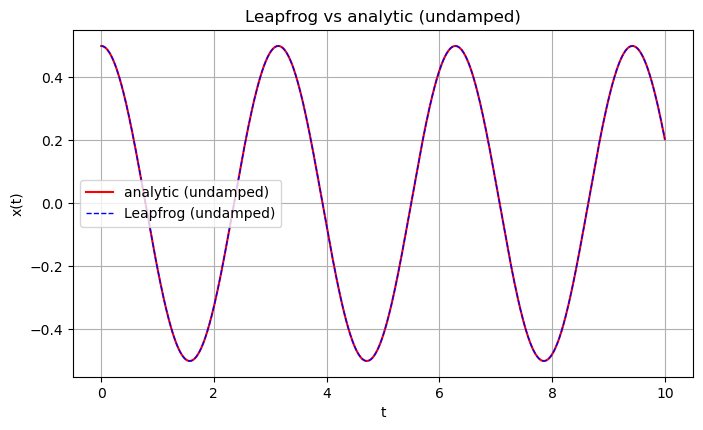

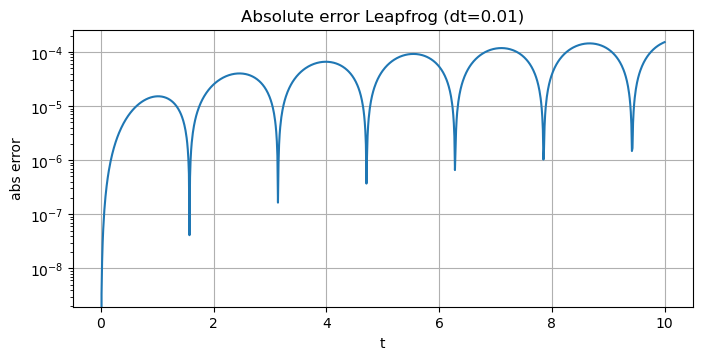

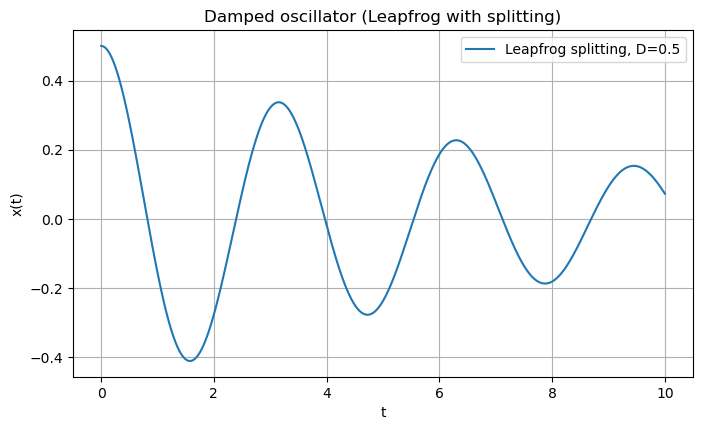

In [22]:
# Parameters from exercise 6 
m = 1.0
k = 4.0
x0 = 0.5
v0 = 0.0

def x_exact_undamped(t, x0, v0, m, k):
    omega = np.sqrt(k/m)
    return x0*np.cos(omega*t) + (v0/omega)*np.sin(omega*t)

# Leapfrog undamped (ungedämpft)
def leapfrog_undamped(x0, v0, t):
    N = len(t)
    x = np.zeros(N)
    # velocities stored at half steps 
    v_half = np.zeros(N) 
    x[0] = x0
    dt = t[1]-t[0]
    # acceleration function (undamped) 
    def a(x): return - (k/m) * x

    # initial half-step velocity:
    v_half[0] = v0 + 0.5*dt * a(x0)   # v_1/2 

    for n in range(N-1):
        # drift: x_n+1 = x_n + dt * v_n+1/2 
        x[n+1] = x[n] + dt * v_half[n]
        # kick: v_n+3/2 = v_n+1/2 + dt * a(x_n+1)
        v_half[n+1] = v_half[n] + dt * a(x[n+1])

    # produce velocities at integer times
    v_at_n = v_half - 0.5*(t[1]-t[0]) * np.array([a(xi) for xi in x])  # approximate v_n
    return x, v_at_n

def leapfrog_damped_splitting(x0, v0, t, D):
    N = len(t)
    x = np.zeros(N)
    v_half = np.zeros(N)
    dt = t[1]-t[0]
    x[0] = x0
    
    # functions
    def a_conservative(x): return - (k/m) * x
    # precompute damping half-factor:
    half_factor = np.exp(- (D/m) * (dt/2.0))

    # initial half-step: applys half-damping to v0, then half-step conservative kick
    v_tmp = v0 * half_factor   # half damping
    v_half[0] = v_tmp + 0.5*dt * a_conservative(x0)

    for n in range(N-1):
        # drift with v_n+1/2
        x[n+1] = x[n] + dt * v_half[n]
        # conservative kick
        v_half[n+1] = v_half[n] + dt * a_conservative(x[n+1])
        v_half[n+1] *= half_factor  # apply half damping at the end of step
        
    # produce velocities at integer times approximate:
    v_at_n = np.zeros(N)
    for i in range(N):
        v_at_n[i] = v_half[i] * np.exp(-(D/m)*(dt/2.0)) - 0.5*dt*a_conservative(x[i])
    return x, v_at_n

# Run experiments 
T = 10.0
dt = 0.01
t = np.arange(0.0, T+dt, dt)
# undamped
x_lf, v_lf = leapfrog_undamped(x0, v0, t)
x_ex = x_exact_undamped(t, x0, v0, m, k)

# comparison
plt.figure(figsize=(8,4.5))
plt.plot(t, x_ex, 'r-', label='analytic (undamped)')
plt.plot(t, x_lf, 'b--', linewidth=1, label='Leapfrog (undamped)')
plt.xlabel('t'); plt.ylabel('x(t)')
plt.title('Leapfrog vs analytic (undamped)')
plt.legend(); plt.grid(True)
plt.show()

# error
err = np.abs(x_lf - x_ex)
plt.figure(figsize=(8,3.6))
plt.plot(t, err)
plt.yscale('log')
plt.xlabel('t'); plt.ylabel('abs error')
plt.title(f'Absolute error Leapfrog (dt={dt})')
plt.grid(True)
plt.show()

# Damped example 
D = 0.5  # friction coefficient
x_lf_d, v_lf_d = leapfrog_damped_splitting(x0, v0, t, D)

# no closed form here unless derive; plot damped numeric
plt.figure(figsize=(8,4.5))
plt.plot(t, x_lf_d, label=f'Leapfrog splitting, D={D}')
plt.xlabel('t'); plt.ylabel('x(t)')
plt.title('Damped oscillator (Leapfrog with splitting)')
plt.grid(True); plt.legend()
plt.show()


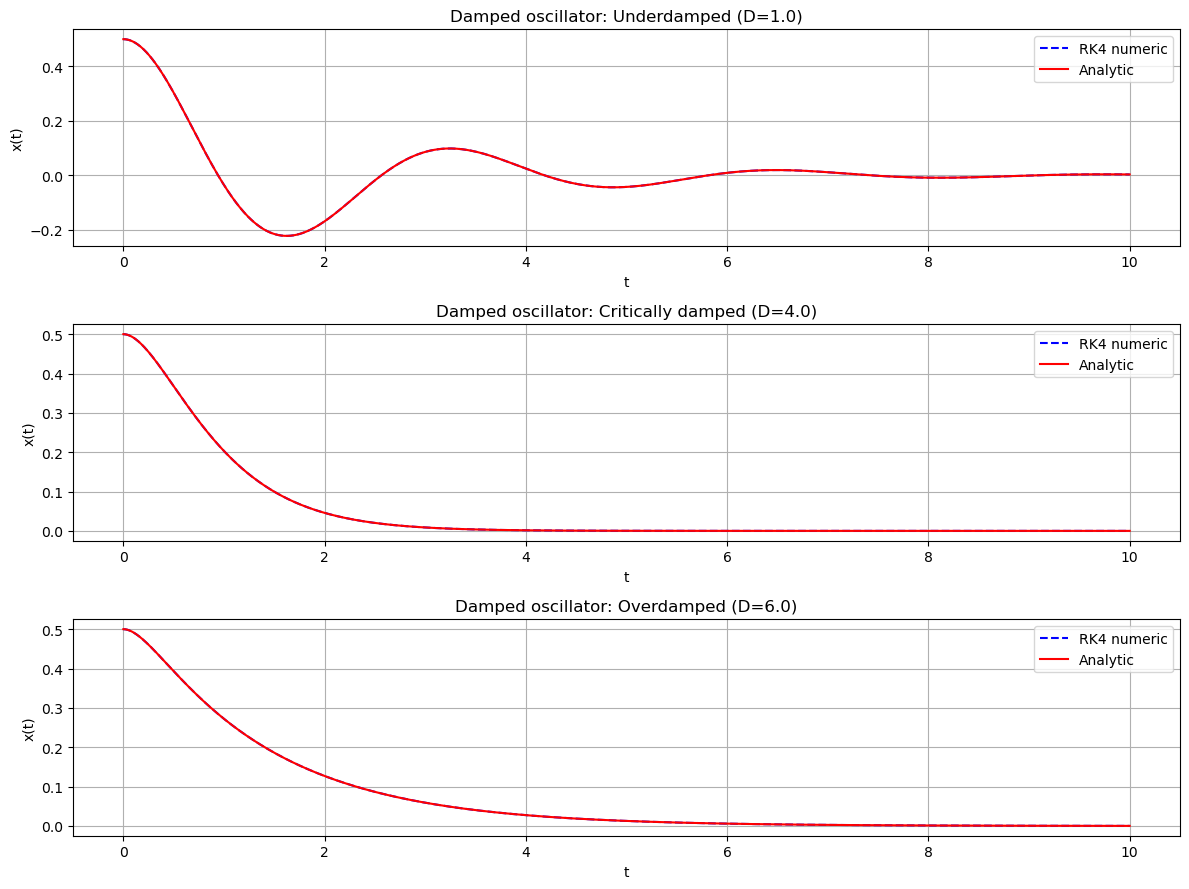

In [23]:
def analytic_solution(t, x0, v0, m, k, D):
    omega0 = np.sqrt(k/m)
    gamma = D/(2*m)

    if D**2 < 4*m*k:  # Underdamped
        omega_d = np.sqrt(omega0**2 - gamma**2)
        A = x0
        B = (v0 + gamma*x0)/omega_d
        return np.exp(-gamma*t) * (A*np.cos(omega_d*t) + B*np.sin(omega_d*t))

    elif D**2 == 4*m*k:  # Critically damped
        A = x0
        B = v0 + gamma*x0
        return (A + B*t) * np.exp(-gamma*t)

    else:  # Overdamped
        r1 = -gamma + np.sqrt(gamma**2 - omega0**2)
        r2 = -gamma - np.sqrt(gamma**2 - omega0**2)
        A = (v0 - r2*x0) / (r1 - r2)
        B = (r1*x0 - v0) / (r1 - r2)
        return A*np.exp(r1*t) + B*np.exp(r2*t)

def rk4_damped_oscillator(x0, v0, t, m, k, D):
    dt = t[1] - t[0]
    N = len(t)
    x = np.zeros(N)
    v = np.zeros(N)
    x[0], v[0] = x0, v0
    
    def derivatives(t, y):
        x, v = y
        dxdt = v
        dvdt = - (k/m)*x - (D/m)*v
        return np.array([dxdt, dvdt])
    
    for i in range(N-1):
        y = np.array([x[i], v[i]])
        k1 = derivatives(t[i], y)
        k2 = derivatives(t[i] + dt/2, y + dt*k1/2)
        k3 = derivatives(t[i] + dt/2, y + dt*k2/2)
        k4 = derivatives(t[i] + dt, y + dt*k3)
        y_next = y + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
        x[i+1], v[i+1] = y_next
    return x, v
# Time array
T = 10.0
dt = 0.01
t = np.arange(0, T+dt, dt)

# Different damping coefficients for the three cases
D_values = {
    "Underdamped (D=1.0)": 1.0,  # D^2 < 4mk = 4*1*4=16
    "Critically damped (D=4.0)": 4.0,
    "Overdamped (D=6.0)": 6.0
}

plt.figure(figsize=(12, 9))

for i, (label, D) in enumerate(D_values.items(), 1):
    x_num, _ = rk4_damped_oscillator(x0, v0, t, m, k, D)
    x_ana = analytic_solution(t, x0, v0, m, k, D)
    
    plt.subplot(3, 1, i)
    plt.plot(t, x_num, 'b--', label='RK4 numeric')
    plt.plot(t, x_ana, 'r-', label='Analytic')
    plt.title(f'Damped oscillator: {label}')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
